# 量子态层析

## 0 背景知识

在量子计算中，我们需要对量子态进行各种操作来实现各种量子算法。很自然地，我们想知道经过各种操作后量子态的具体形式，而量子态层析就能为我们实现这个目的。量子态层析是一个通过测量来重建量子态的过程，可用于识别未知量子态、评估量子操作效果等。其基本原理是在具有相同量子态的系统上用一些特定的算子重复进行测量，得到测量概率的一个近似估计，从而确定量子态对应的密度矩阵。量子态层析对纯态与混态均可使用，为了保证测量包含了量子态的全部信息，用于测量的算子必须在希尔伯特空间上构成一组完备基。  
比如对一个单量子比特的纯态，其量子态可写为 $|\psi\rangle =cos{\frac{\theta}{2}}|0\rangle + e^{i\phi} sin{\frac {\theta}{2}}|1\rangle$ 的形式，需要 $\theta$ 和 $\phi$ 两个参数才能确定该量子态，而对于单量子比特的混态，其密度矩阵共有三个独立变量，需将三个独立变量全部确定才能确定该量子态。通过量子态层析就可以确定之前提到的全部参数。而一旦确定了量子态，其包含的全部信息也就可以被确定，就如同统计力学中知道了配分函数，就可以用其推出各种所需的物理量。   

## 1 量子态层析

量子态层析可以对单量子比特进行，也可对多量子比特进行。其中单量子比特的量子态层析相对简单，我们将对其进行详细的推导与分析，并在后文给出一个 PyQuafu 的演示样例。对于 n 个量子比特的量子态层析，我们将直接给出结论，有兴趣的读者可仿照单量子比特情形对其进行推导。

### 1.1 单量子比特的量子态层析

单量子比特的密度矩阵 $\rho$ 是一个 $2 \times 2 $ 的矩阵。由于单位矩阵与三个泡利矩阵构成了一组在希尔伯特-施密特内积下的正交基底，其中 
$$
I=\begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix},\sigma_1=\sigma_X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix},\sigma_2=\sigma_Y=\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix},\sigma_3=\sigma_Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix} \tag{1}
$$
因此密度矩阵 $\rho$ 可被分解为 $\rho = cI + \sum\limits_{i=1}^3 c_i \sigma_i$。由 $\begin{cases} tr(\rho)=1 \\ tr(I)=2 \\ tr(\sigma_i)=0 \end{cases}$，可得 $c = \frac{1}{2}$。结合泡利矩阵的性质 $\sigma_i \sigma_j = \delta_{ij}I + i \epsilon_{ijk}\sigma_k$，可得 $c_i=\frac{1}{2}tr(\sigma_i\rho)$。因此
$$
\rho = \frac{I}{2}+\frac{1}{2}\sum_{i=1}^3 tr(\rho\sigma_i) \sigma_i =\frac{I}{2}+\frac{1}{2}\sum_{i=1}^3 \lambda_i \sigma_i \tag{2}
$$
其中 $\lambda_i=tr(\sigma_i\rho)$。注意到 $\langle O \rangle_\rho=tr(O \rho)$，即 $tr(O \rho)$ 为可观测算子 $O$ 的期望值。因此可以制备很多相同的量子态，对可观测量 $\sigma_i$ 进行多次测量，从而得到对 $\lambda_i$ 的一个估计，实现对单量子比特的量子态层析。  
此外，单量子比特的密度矩阵也有其几何解释，即式(2)中的 $\vec{\lambda} = (\lambda_1,\lambda_2,\lambda_3)$ 可被视为 Bloch 球上的一个三维矢量，称其为 Bloch 矢量。当 $\sum\limits_{i=1}^3 \lambda_i^2=1$ 时，该矢量落在球面上，对应的量子态为纯态；当 $\sum\limits_{i=1}^3 \lambda_i^2 < 1$ 时，该矢量落在球内，对应的量子态为混态。Bloch 矢量的长度不同，反映量子态的混合程度不同，当矢量长度为0时，其密度矩阵为 $\frac{I}{2}$，对应量子态被称为完全混态。

### 1.2 n 个量子比特的量子态层析

类似于单量子的情况，n 个量子比特的密度矩阵可被展开为
$$
\rho = \sum_{\vec{v}}\frac{tr(\sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n} \, \rho) \, \sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n} }{2^n} \tag{3}
$$
其中求和对向量 $\vec v = (v_1, \cdots , v_n)$ 进行，$v_i \in \{0,1,2,3\}$，将单位矩阵记为第 0 个泡利矩阵，即 $\sigma_0 = I$。类似单量子比特情形，通过对上述泡利矩阵乘积对应的可观测量进行测量，我们可以得到求和项中各个系数的近似估计，从而实现对 n 个量子比特的量子态层析。

## 2 演示逻辑

我们将对单量子比特的量子态层析进行演示，演示逻辑如下。  
构造量子电路，将量子比特从 $|0\rangle$ 旋转为 $|\psi\rangle =\cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle$，其中 $\theta\in[0,\pi]$，$\phi \in [0,2\pi] $。旋转测量基，分别以 $\sigma_X$, $\sigma_Y$, $\sigma_Z$ 算子的本征态为基进行测量，根据测量结果求出对应算子的期望，从而实现对单量子比特的量子态层析。可用层析结果得到量子态的密度矩阵 $\rho$ 与 Bloch 矢量，并可将其与理论计算结果、模拟器模拟结果比较。改变 $\theta$ 和 $\phi$ 的值，可对不同的量子态进行演示。

## 3 PyQuafu 实现

### 3.1 创建量子态

定义函数来创建一个单量子比特态，其将量子态从 $|0\rangle$ 变为 $|\psi\rangle =\cos{\frac{\theta}{2}}|0\rangle + e^{i\phi} \sin{\frac {\theta}{2}}|1\rangle$，并可自行选择 $X$,$Y$,$Z$ 算子的本征态为基进行测量。

In [1]:
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

def create_circuit(theta, phi, base="Z"):  
    # 创建量子态：|ψ> = cos(θ/2)|0> + exp(i*φ)*sin(θ/2)|1>
    qc = QuantumCircuit(1)
    qc.ry(0,theta)
    qc.rz(0,phi)
    # 旋转测量基
    if base == "X":
        qc.ry(0, -pi/2)  # 用X的本征态为测量基
    elif base == "Y":
        qc.rx(0, pi/2)   # 用Y的本征态为测量基
    elif base == "Z":
        pass
    qc.measure([0])
    return qc

创建了一个 $\theta=\frac{2\pi}{3},\phi=\frac{\pi}{4}$ 的例子，绘制了电路图，并用模拟器给出了量子态的密度矩阵。

量子态的密度矩阵ρ为：
[[0.25      +0.j         0.30618622-0.30618622j]
 [0.30618622+0.30618622j 0.75      +0.j        ]]


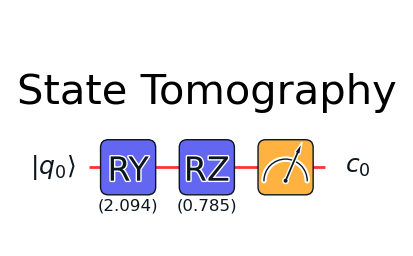

In [2]:
q=create_circuit(theta=2*pi/3, phi=pi/4)
q.plot_circuit("State Tomography")
sim_res = simulate(q,output="density_matrix")
print("量子态的密度矩阵ρ为：",sim_res.rho,sep="\n")

当 $\theta=\frac{2\pi}{3},\phi=\frac{\pi}{4}$ 时，量子态为 $|\psi\rangle =\frac{1}{2}|0\rangle + \frac{\sqrt{3}}{2}e^{i\frac{\pi}{4}}|1\rangle$，密度矩阵为 $\rho = |\psi\rangle \langle\psi| = \begin{pmatrix} \frac{1}{4} & \frac{\sqrt{6}}{8}-\frac{\sqrt{6}}{8}i \\ \frac{\sqrt{6}}{8}+\frac{\sqrt{6}}{8}i & \frac{3}{4}\end{pmatrix}$，与模拟器模拟的结果相同。

### 3.2 创建演示任务

定义用于创建演示任务的函数。它有 `theta`、`phi`、`experimental` 三个参数，`theta` 和 `phi` 用于确定所构造量子态的 $\theta$ 和 $\phi$，`experimental` 用于选择在真机上运行或用模拟器运行。该函数将分别以 $X$,$Y$,$Z$ 算子的本征态为基进行测量，并将相应测量算子的期望 $\lambda_X$,$\lambda_Y$,$\lambda_Z$ 放在 `obsexp` 中。  
该函数有两个返回参数，`obsexp`、`experimental`，分别表示三个期望以及该运算是在真机还是模拟器上运行。此外，如果在真机上运行，该函数将显示任务的历史记录，可以将其保存它以便之后查看。

In [3]:
def state_tomo(theta, phi, experimental: bool = False):
    base_name = ['X','Y','Z']  # 定义测量基的名称
    obsexp=[]  # 保存 E(X),E(Y),E(Z) 的值
    groupname="state_tomo"  # 任务组的名字
    task = Task()  # 创建并配置Task
    task.config(backend="ScQ-P18", shots=2000, compile=True) # "ScQ-P10", "ScQ-P18", "ScQ-P136"
    if experimental:
        print("sending task...")
    for i in range(3):  # 分别用三种测量基对量子态进行测量
        qc = create_circuit(theta=theta, phi=phi, base=base_name[i])
        if experimental:
            res = task.send(qc, name=base_name[i], group=groupname)
            obsexp.append(res.calculate_obs([0]))
        else:
            simu_res = simulate(qc)
            obsexp.append(simu_res.calculate_obs([0]))
    if experimental:
        history=task.get_history()
        print("taskid：",history,"\n",sep="")  # 保存任务id以便下次查询
    return obsexp,experimental

定义单位矩阵和泡利矩阵，以便后续由测量结果推出密度矩阵。

In [4]:
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

定义画出 Bloch 向量的函数，用于将密度矩阵可视化。

In [5]:
def plot_bloch_vector(v_x, v_y, v_z, title=""):
    # 创建一个图形对象
    fig = plt.figure()
    # 创建一个3D坐标轴对象
    ax = fig.add_subplot(111, projection='3d')
    # 定义球体的参数方程
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 5000)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    # 绘制球体的表面，并给出框线
    ax.plot_surface(x, y, z, color="white", alpha=0.4)
    ax.plot_wireframe(x, y, z, color="black", rcount=2, ccount=2, linewidth=0.4)
    ax.plot_wireframe(x, y, z, color="grey", rcount=4, ccount=6, linewidth=0.4)
    # 绘制球内坐标轴
    span = np.linspace(-1.0, 1.0, 2)
    ax.plot(span, 0 * span, zs=0, zdir="z", label="X", lw=0.4, color="black")
    ax.plot(0 * span, span, zs=0, zdir="z", label="Y", lw=0.4, color="black")
    ax.plot(0 * span, span, zs=0, zdir="y", label="Z", lw=0.4, color="black")
    ax.text(1.4, 0, 0, 'x', color='black')
    ax.text(0, 1.2, 0, 'y', color='black')
    ax.text(0, 0, 1.2, 'z', color='black')
    # 绘制 Bloch 向量，设置颜色为红色
    ax.quiver(0, 0, 0, v_x, v_y, v_z, color='r')
    ax.text(0, 0, 1.6, 'Bloch vector: ({:.2f}, {:.2f}, {:.2f})'.format(v_x,v_y,v_z), fontsize=8, color='red')
    # 设置坐标轴的范围
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.view_init(32, 32)
    ax.set_axis_off()
    ax.set_title(title)
    # 显示图形
    plt.show()

###  3.3 在模拟器上运行的结果

通过调用 `state_tomo` 函数并将 `experimental` 参数设置为 False，我们可以得到模拟器模拟的各算符期望 $\lambda_X$, $\lambda_Y$, $\lambda_Z$。代入公式 $\rho=\frac{I}{2}+\frac{1}{2}\sum_{i=1}^3 \lambda_i \sigma_i $ 即可求出量子态的密度矩阵。同时我们可得到量子态对应的 Bloch 矢量，并调用 `plot_bloch_vector` 函数将其可视化。

根据模拟器的模拟结果, λx = 0.612372, λy = 0.612372, λz = -0.500000
密度矩阵:
ρ = I/2 + (λx X +λy Y +λz Z)/2 = 
[[0.25      +0.j         0.30618622-0.30618622j]
 [0.30618622+0.30618622j 0.75      +0.j        ]]

Bloch矢量为(0.612372, 0.612372, -0.500000)，其示意图如下:


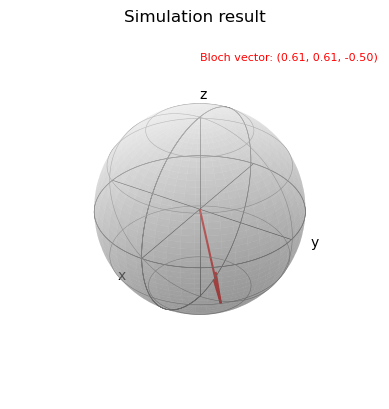

In [6]:
obsexp, experimental = state_tomo(theta=2*pi/3, phi=pi/4, experimental=False)
rho = (I + obsexp[0]*X + obsexp[1]*Y + obsexp[2]*Z)/2
print("根据模拟器的模拟结果, λx = {:.6f}, λy = {:.6f}, λz = {:.6f}".format(*obsexp))
print("密度矩阵:","ρ = I/2 + (λx X +λy Y +λz Z)/2 = ",rho,"",sep="\n")
print("Bloch矢量为({:.6f}, {:.6f}, {:.6f})，其示意图如下:".format(*obsexp))
plot_bloch_vector(*obsexp, title = "Simulation result")

模拟器通过量子态层析方式得到的密度矩阵与之前直接计算与模拟得到的结果相同。

### 3.4 在真机上运行的结果

通过调用 `state_tomo` 函数并将 `experimental` 参数设置为 True，我们可以得到在真机上运行的结果，同时所运行任务的历史也将显示。

sending task...
taskid：{'state_tomo': ['37EB3600381A4632', '37EB3680282ABED2', '37EB3780177CE0E0']}

根据在真机上的测量结果, λx = 0.609000, λy = 0.595000, λz = -0.529000
密度矩阵:
ρ = I/2 + (λx X +λy Y +λz Z)/2 = 
[[0.2355+0.j     0.3045-0.2975j]
 [0.3045+0.2975j 0.7645+0.j    ]]

Bloch矢量为(0.609000, 0.595000, -0.529000)，其示意图如下:


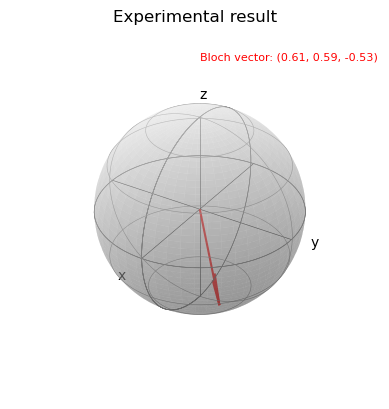

In [7]:
obsexp, experimental = state_tomo(theta=2*pi/3, phi=pi/4, experimental=True)
rho = (I + obsexp[0]*X + obsexp[1]*Y + obsexp[2]*Z)/2
print("根据在真机上的测量结果, λx = {:.6f}, λy = {:.6f}, λz = {:.6f}".format(*obsexp))
print("密度矩阵:","ρ = I/2 + (λx X +λy Y +λz Z)/2 = ",rho,"",sep="\n")
print("Bloch矢量为({:.6f}, {:.6f}, {:.6f})，其示意图如下:".format(*obsexp))
plot_bloch_vector(*obsexp, title = "Experimental result")

可以看到，实验结果与理论计算值十分接近。至此成功实现了单量子比特的量子态层析演示。